In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [184]:
data = pd.read_csv("insurance.csv")

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Cleaning data

In [129]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [130]:
data.duplicated().sum()

1

In [131]:
data.drop_duplicates(keep=False,inplace=True)

In [132]:
data.duplicated().sum()

0

# Visualization data

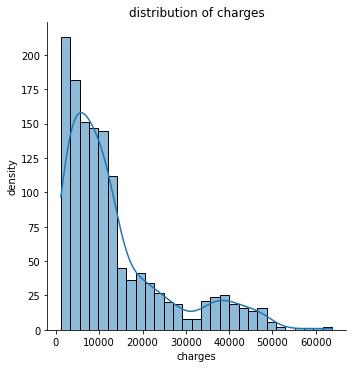

In [144]:
sns.displot(data["charges"],kde=True)

plt.title('distribution of charges')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

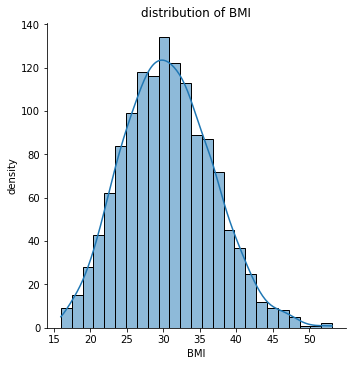

In [145]:
sns.displot(data["bmi"],kde=True)

plt.title('distribution of BMI')
plt.ylabel('density')
plt.xlabel('BMI')
plt.show()

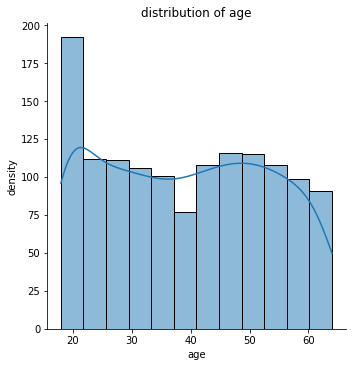

In [146]:
sns.displot(data["age"],kde=True)

plt.title('distribution of age')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

In [142]:
display(data["age"].agg(["max","min"]))

max    64
min    18
Name: age, dtype: int64

pada grafik diatas, dapat dilihat:
1. pada dataset ini, terdapat pasien dibawah umur 20 tahun
2. dengan umur minimal 18 tahun dan maksimal 64 tahun

<AxesSubplot:xlabel='smoker', ylabel='count'>

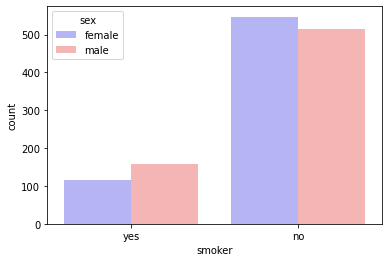

In [159]:
sns.countplot(x="smoker",hue="sex", data=data, palette="bwr")

In [161]:
data["smoker"].value_counts()

no     1062
yes     274
Name: smoker, dtype: int64

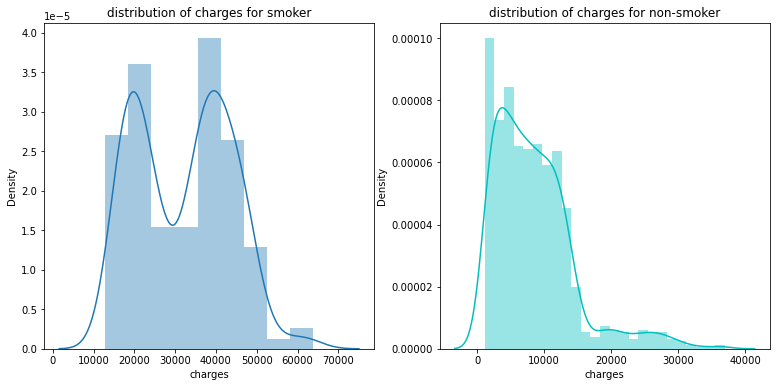

In [156]:
T = plt.figure(figsize=(13,6))

ax= T.add_subplot(121)
sns.distplot(data[(data["smoker"] == "yes")]["charges"],ax=ax)
ax.set_title("distribution of charges for smoker")

ax= T.add_subplot(122)
sns.distplot(data[(data["smoker"] == "no")]["charges"], color="c", ax=ax)
ax.set_title("distribution of charges for non-smoker")
plt.show()

pada grafik pada dilihat:
1. charges (tagihan) kesehatan pada smoker memiliki nilai yang lebih besar dibandingkan dengan mereka yang non-smoker

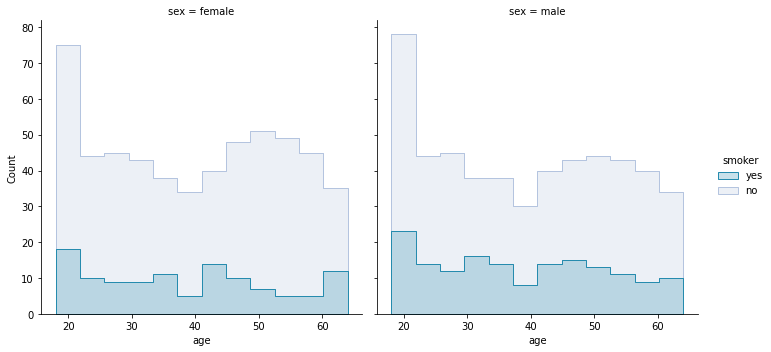

In [199]:
sns.displot(data, x="age", hue="smoker",element="step", col="sex", palette="PuBuGn_r")
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

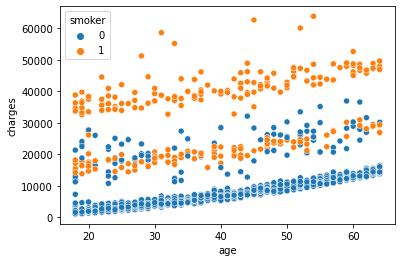

In [178]:
sns.scatterplot(data=data, x="age", y="charges", hue="smoker")

pada grafik diatas, dapat dilihat
1. tagihan pada pasien akan terus naik seiiring bertambahnya umur untuk pasien non-smoker
2. berbeda dengan pasien smoker, tagihan mereka memiliki nilai yang variansi dan cukup tinggi, diatas rata-rata pasien non smoker

# Feature Engineering

sebelum memasukin bagian Machine Learning, perlu dilakukan Feature Engineering
pada kasus ini, akan mengubah beberapa variabel dari categorical menjadi numeric yang berhubungan langsung dengan target

In [165]:
#data sex convert to numeric
df_one = pd.get_dummies(data["sex"]) 
df_one = df_one.drop(["female"], axis=1) 
data = pd.concat((df_one, data), axis=1) 
data = data.drop(["sex"], axis=1) 
data = data.rename(columns={"male":"sex"}) 
data   #sex menjadi binary dimana 1 untuk male dan 0 untuk female

,sex,age,bmi,children,smoker,region,charges
0,0,19,27.900,0,yes,southwest,16884.92400
1,1,18,33.770,1,no,southeast,1725.55230
2,1,28,33.000,3,no,southeast,4449.46200
3,1,33,22.705,0,no,northwest,21984.47061
4,1,32,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,1,50,30.970,3,no,northwest,10600.54830
1334,0,18,31.920,0,no,northeast,2205.98080
1335,0,18,36.850,0,no,southeast,1629.83350
1336,0,21,25.800,0,no,southwest,2007.94500


In [166]:
#data smoker convert to numeric
df_one = pd.get_dummies(data["smoker"])
df_one = df_one.drop(["no"], axis=1)
data = pd.concat((df_one, data), axis=1)
data = data.drop(["smoker"], axis=1)
data = data.rename(columns={"yes":"smoker"})
#1 untuk yes, 0 untuk no

In [168]:
#data region convert to numeric
df_one = pd.get_dummies(data['region'],prefix='region')
data = pd.concat([data, df_one], axis=1)
data = data.drop(["region"], axis=1)
data

,smoker,sex,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,19,27.900,0,16884.92400,0,0,0,1
1,0,1,18,33.770,1,1725.55230,0,0,1,0
2,0,1,28,33.000,3,4449.46200,0,0,1,0
3,0,1,33,22.705,0,21984.47061,0,1,0,0
4,0,1,32,28.880,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0,1,50,30.970,3,10600.54830,0,1,0,0
1334,0,0,18,31.920,0,2205.98080,1,0,0,0
1335,0,0,18,36.850,0,1629.83350,0,0,1,0
1336,0,0,21,25.800,0,2007.94500,0,0,0,1


# Matrix Correlation

berikutnya, perlu kita lihat matrix correlation

In [29]:
data.corr()

,smoker,sex,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
smoker,1.000000,0.076185,-0.025019,0.003750,0.007673,0.787251,0.002811,-0.036945,0.068498,-0.036945
sex,0.076185,1.000000,-0.020856,0.046371,0.017163,0.057292,-0.002425,-0.011156,0.017117,-0.004184
age,-0.025019,-0.020856,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016
bmi,0.003750,0.046371,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.007673,0.017163,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914
charges,0.787251,0.057292,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002811,-0.002425,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.036945,-0.011156,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,0.068498,0.017117,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,-0.036945,-0.004184,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


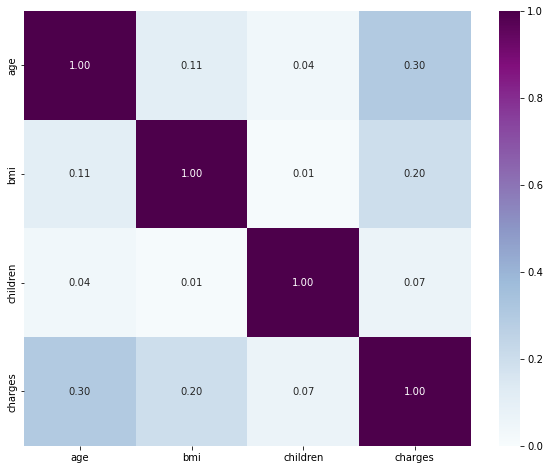

In [164]:
#sebelum dilakukan Feature Engineering
corr_= data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_,annot=True,fmt = ".2f", cmap = "BuPu", vmax=1, vmin=0)
plt.show()

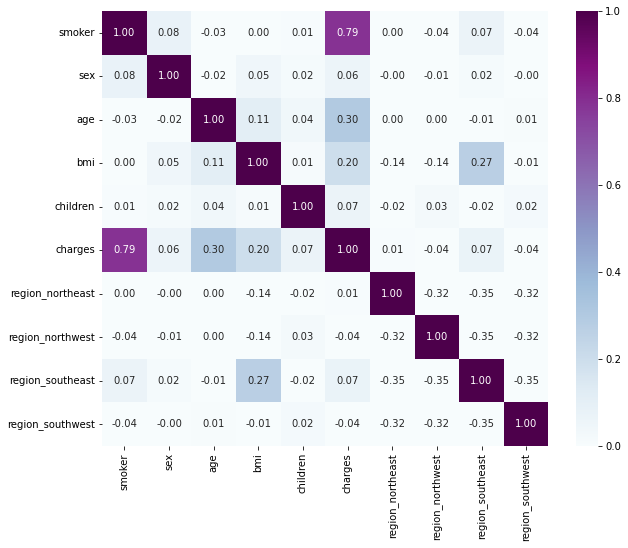

In [169]:
#setelah dilakukan Feature Engineering
corr_= data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_,annot=True,fmt = ".2f", cmap = "BuPu", vmax=1, vmin=0)
plt.show()

pada grafik diatas, dapat dilihat
1. beberapa faktor mempengaruhi nilai tagihan (charges) pasien adalah BMI, age, dan smoker
2. dimana variable smoker, memiliki nilai korelasi yang sangat tinggi pada target variabel, yaitu charges

# Machine Learning

In [71]:
#menentukan variabel yang akan digunakan
model_1 = data[["smoker", "age", "bmi", "children","charges"]]

In [72]:
model_1

,smoker,age,bmi,children,charges
0,1,19,27.900,0,16884.92400
1,0,18,33.770,1,1725.55230
2,0,28,33.000,3,4449.46200
3,0,33,22.705,0,21984.47061
4,0,32,28.880,0,3866.85520
...,...,...,...,...,...
1333,0,50,30.970,3,10600.54830
1334,0,18,31.920,0,2205.98080
1335,0,18,36.850,0,1629.83350
1336,0,21,25.800,0,2007.94500


## split the data

In [170]:
X = model_1.drop(columns='charges').to_numpy()
y = model_1[['charges']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## scaling the data

In [171]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

## lasso regression

In [92]:
lasso_reg = Lasso(max_iter=10000, random_state=42)

In [93]:
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10)
}

lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10)},
             scoring='neg_root_mean_squared_error')

In [95]:
coef_df_1 = pd.DataFrame({
    'feature':['intercept'] + model_1.drop(columns='charges').columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df_1

,feature,coefficient
0,intercept,13346.089736
1,smoker,9559.323151
2,age,3616.318169
3,bmi,1978.420423
4,children,519.225278


pada hasil diatas dapat dilihat, nilai tagihan dipengaruhi besar oleh variabel smoker, dan age
semakin tinggi age dan smoker, maka semakin tinggi juga nilai tagihan untuk setiap pasien

In [172]:
y_pred = lasso_reg_gridcv.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,4.213799e+03
MSE_li_reg,3.398165e+07
RMSE_li_reg,5.829379e+03
